In [1]:
import sys, string
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
import re
stemmer = PorterStemmer()
import pandas as pd
import numpy as np
import scipy
from sklearn.metrics import mean_squared_error

In [2]:
def load_file(file):
    reviews = []
    ratings = []
    df = pd.read_csv(file,encoding='ISO-8859-1') 
    for review in df.text:
        reviews.append(review)
    for rate in df.overall_rate:
        ratings.append(rate)
    return reviews, ratings

In [3]:
reviews, overallrating = load_file("10027.csv")


In [4]:
print (len(reviews), reviews[1])

10027 This is a great car but beware before purchasing - I'm only at 3,000 miles and my tires almost need to be replaced! At this rate, you could spend thousands of dollars extra on tires every year. I love the car but am dissatisfied with a few things--the standard sound package is not up to par or comparable with other luxury brands--low-end features for the price of the car; also, at my 2,500 mile tuneup and oil change, they let me know that the tires almost need to be replaced and I've only been driving the car for 3,000 miles--unacceptable! At that rate, I'll have to purchase four new sets of tires per year. I have never heard of such a thing and would be much less likely to buy this car again, or recommend it to a friend, based on this issue. Jul 24, 2016I am 1000% pleased with the car's performance and reliability, thus far. I have just a few minor issues, such as the fact that the options on the standard sound system--in this new luxury car--seem to not be on par for standard s

In [5]:
def parse_to_sentence(reviews):
	review_processed = []
	actual = []
	only_sent = []
	for r in reviews:
		sentences = nltk.sent_tokenize(r)
		actual.append(sentences)
		sent = []
		for s in sentences:
			#words to lower case
			s = s.lower()
			#remove punctuations and stopwords
			replace_punctuation = str.maketrans(string.punctuation, ' '*len(string.punctuation))
			s = s.translate(replace_punctuation)
			stop_words	 = list(stopwords.words('english'))
			additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
			# additional_stopwords = []
			stop_words = set(stop_words + additional_stopwords)
			# print stop_words
			# sys.exit()
			word_tokens = word_tokenize(s)
			s = [w for w in word_tokens if not w in stop_words]
			#Porter Stemmer
			stemmed = [stemmer.stem(w) for w in s]
			if len(stemmed)>0:
				sent.append(stemmed)
		review_processed.append(sent)
		only_sent.extend(sent)
	return review_processed, actual, only_sent

# sent = parse_to_sentence(reviews)
# print len(sent), sent[2]

In [6]:
review_sent, review_actual, only_sent = parse_to_sentence(reviews)

print (len(only_sent), only_sent[2])
print(len(review_sent), review_sent[1])
print(len(review_actual),review_actual[1])


46503 ['trunk', 'good', 'amount', 'room', 'storag']
10027 [['great', 'car', 'bewar', 'purchas', '3', '000', 'mile', 'tire', 'almost', 'need', 'replac'], ['rate', 'could', 'spend', 'thousand', 'dollar', 'extra', 'tire', 'everi', 'year'], ['love', 'car', 'dissatisfi', 'thing', 'standard', 'sound', 'packag', 'par', 'compar', 'luxuri', 'brand', 'low', 'end', 'featur', 'price', 'car', 'also', '2', '500', 'mile', 'tuneup', 'oil', 'chang', 'let', 'know', 'tire', 'almost', 'need', 'replac', 'drive', 'car', '3', '000', 'mile', 'unaccept'], ['rate', 'purchas', 'four', 'new', 'set', 'tire', 'per', 'year'], ['never', 'heard', 'thing', 'would', 'much', 'less', 'like', 'buy', 'car', 'recommend', 'friend', 'base', 'issu'], ['jul', '24', '2016i', '1000', 'pleas', 'car', 'perform', 'reliabl', 'thu', 'far'], ['minor', 'issu', 'fact', 'option', 'standard', 'sound', 'system', 'new', 'luxuri', 'car', 'seem', 'par', 'standard', 'sound', 'system', '1', '2', 'year', 'old', 'non', 'luxuri', 'brand', 'car'], ['

In [7]:
s = 0
for k in range (0,10027):
     s += len(review_sent[k])
print(s)    
print(s/10027)

46503
4.6377779994016155


In [8]:
print(len(review_sent), review_sent[1])
print(len(review_actual),review_actual[1])
print(len(review_sent[1]))

10027 [['great', 'car', 'bewar', 'purchas', '3', '000', 'mile', 'tire', 'almost', 'need', 'replac'], ['rate', 'could', 'spend', 'thousand', 'dollar', 'extra', 'tire', 'everi', 'year'], ['love', 'car', 'dissatisfi', 'thing', 'standard', 'sound', 'packag', 'par', 'compar', 'luxuri', 'brand', 'low', 'end', 'featur', 'price', 'car', 'also', '2', '500', 'mile', 'tuneup', 'oil', 'chang', 'let', 'know', 'tire', 'almost', 'need', 'replac', 'drive', 'car', '3', '000', 'mile', 'unaccept'], ['rate', 'purchas', 'four', 'new', 'set', 'tire', 'per', 'year'], ['never', 'heard', 'thing', 'would', 'much', 'less', 'like', 'buy', 'car', 'recommend', 'friend', 'base', 'issu'], ['jul', '24', '2016i', '1000', 'pleas', 'car', 'perform', 'reliabl', 'thu', 'far'], ['minor', 'issu', 'fact', 'option', 'standard', 'sound', 'system', 'new', 'luxuri', 'car', 'seem', 'par', 'standard', 'sound', 'system', '1', '2', 'year', 'old', 'non', 'luxuri', 'brand', 'car'], ['word', 'level', 'excus', 'standard', 'sound', 'syste

In [9]:
print(len(review_actual),review_actual[44])
print(len(review_sent[44]))

10027 ['Acura ILX is a great dependable vehicle with the most updated technology.', 'I love driving my vehicle in that it feels luxurious yet sporty.']
2


In [10]:
def create_vocab(sent):
	words = []
	for s in sent:
		words += s
	freq = FreqDist(words)
	vocab = []
	for k,v in freq.items():
		vocab.append(k)
		#if v > 5:
		#	vocab.append(k)
	#Assign a number corresponding to each word. Makes counting easier.
	vocab_dict = dict(zip(vocab, range(len(vocab))))
	return vocab, vocab_dict

In [11]:
vocab, vocab_dict = create_vocab(only_sent)

In [12]:
print(vocab_dict)

{'car': 0, 'drive': 1, 'fantast': 2, 'sporti': 3, 'enough': 4, 'need': 5, 'econom': 6, 'break': 7, 'wallet': 8, 'trunk': 9, 'good': 10, 'amount': 11, 'room': 12, 'storag': 13, 'realli': 14, 'fun': 15, 'vehicl': 16, 'great': 17, 'cover': 18, 'carri': 19, 'adult': 20, 'back': 21, 'seat': 22, 'may': 23, 'littl': 24, 'troubl': 25, 'long': 26, 'distanc': 27, 'audio': 28, 'system': 29, 'tech': 30, 'plu': 31, 'packag': 32, 'phenomen': 33, 'consist': 34, 'share': 35, 'prais': 36, 'friend': 37, 'qualiti': 38, 'one': 39, 'difficulti': 40, 'connect': 41, 'new': 42, 'phone': 43, 'via': 44, 'bluetooth': 45, 'mean': 46, 'passeng': 47, 'want': 48, 'stream': 49, 'song': 50, 'speaker': 51, 'must': 52, 'use': 53, 'auxiliari': 54, 'cabl': 55, 'price': 56, 'fulli': 57, 'load': 58, 'ilx': 59, 'cheaper': 60, 'base': 61, 'tlx': 62, 'work': 63, 'smaller': 64, 'better': 65, 'time': 66, 'accessori': 67, 'featur': 68, 'someth': 69, 'enjoy': 70, 'mani': 71, 'thing': 72, 'love': 73, 'fact': 74, '1': 75, 'shut': 76

In [13]:
print(len(only_sent))

46503


In [14]:
len(vocab)

9777

# 2nd part

In [15]:
#from preprocess import *
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [16]:
#goal: map sentences to corresponding aspect.

def get_aspect_terms(file, vocab_dict):
	aspect_terms = []
	w_notfound = []
	f = open(file, "r")
	for line in f:
		s = line.strip().split(",")
		stem = [stemmer.stem(w.strip().lower()) for w in s]
		#we store words by their corresponding number.
		# aspect = [vocab_dict[w] for w in stem]
		aspect = []
		for w in stem:
			if w in vocab_dict.keys():
				aspect.append(w)
			else:
				w_notfound.append(w)
		aspect_terms.append(aspect)
	#We are only using one hotel review file, as we keep inceasing the number of files words not found will decrease.
	# print "Words not found in vocab:", ' '.join(w_notfound)
	f.close()
	return aspect_terms

In [17]:
aspect_terms = get_aspect_terms("keywords.csv", vocab_dict)

In [18]:
print(aspect_terms)
print(len(aspect_terms))

[['tech', 'technolog', 'phone', 'bluetooth', 'power', 'navig', 'acc', 'android', 'touch', 'touchscreen', 'cruis', 'navi', 'softwar', 'horsepow', 'camera', 'radio', 'entertain', 'remot', 'lane', 'display', 'button', 'infotain', 'voic', 'electron', 'sensor', 'connect', 'nav', 'iphon', 'smartphon', 'map', 'connect', 'cellphon', 'keyless', 'connect', 'comput', 'gp', 'featur', 'appl', 'play', 'ac'], ['audio', 'speaker', 'sound', 'stereo', 'aux', 'media', 'mp3', 'player', 'cd', 'music', 'song', 'loud'], ['engin', 'automat', 'transmiss', 'acceler', 'acceler', 'perform', 'steer', 'gasket', 'cylind', 'wheel', 'gear', 'gearbox', 'awd', 'drive', 'handl', 'engin', 'exhaust', 'diesel', 'auto', 'drivetrain', 'autom', 'tow', 'haul', 'gearshift'], ['window', 'door', 'headlight', 'windshield', 'exterior', 'wheel', 'tire', 'wiper', 'color', 'style', 'liftgat', 'paint', 'tailgat', 'lift', 'gate', 'flat', 'rear', 'tail', 'headlamp'], ['seat', 'seatbelt', 'heat', 'lumbar', 'backseat', 'memori'], ['trunk', 

In [19]:

sid = SIA()

p = 5

I = 1




	#label_text = ['Value', 'Rooms', 'Location', 'Cleanliness', 'Check in/Front Desk', 'Service', 'Business Service']
	# print aspect_terms

	#ALGORITHM
review_labels = []
k = len(aspect_terms)
v = len(vocab)
aspect_words = np.zeros((k,v))
aspect_sent = np.zeros(k)
num_words = np.zeros(v)

for i in range(I):
	for r in review_sent:
		labels = []
		for s in r:
			count = np.zeros(len(aspect_terms))
			i = 0
			for a in aspect_terms:
				for w in s:
					if w in vocab_dict.keys():
						num_words[vocab_dict[w]] += 1
						if w in a:
							count[i] += 1
				i = i + 1    
			if max(count) > 0:
				#la = np.where(np.max(count) == count)[0].tolist()
				la = []
				for j in range (0,len(aspect_terms)):
					if count[j] != 0:
						la.append(j)
				#la = np.where(np.count != 0)[0].tolist()
				#print(la)
				labels.append(la)
				for i in la:
					aspect_sent[i] += 1
					for w in s:
						if w in vocab_dict.keys():
							aspect_words[i][vocab_dict[w]] += 1
			else:
				labels.append([])
		#print(labels)
		review_labels.append(labels)
			# aspect_w_rank = chi_sq_mat()
			# new_labels = []
			# for na in aspect_w_rank:
			# 	x = np.argsort(na)[::-1][:p]
			# 	new_labels.append(x)
				# for k,v in vocab_dict.items():
				# 	if vocab_dict[k] in x:
				# 		print k
				# print 
			# sys.exit()



In [20]:
print(len(review_labels[1]))
print(review_labels[1])
print(len(review_labels))

11
[[3, 12], [3], [0, 1, 2, 3, 10, 11, 12], [3], [12], [2, 8, 12], [1, 10], [0, 1, 3], [1, 12], [4, 10], []]
10027


# Counting

In [21]:
# total sentences
multi_dict = {}
sentence = 0
multi_sentence = 0
for i in range(0, 10027):
    sentence += len(review_labels[i])
    for j in range(0, len(review_labels[i])):
        #if len(review_labels[i][j]) >= 2:
        if len(review_labels[i][j]) == 2 and not 12 in review_labels[i][j] or len(review_labels[i][j]) >=3:
            
            multi_sentence  += 1
            print(review_actual[i][j])
            multi_dict.setdefault(i,[]).append(j)
            
print(sentence)
print(multi_sentence)
print(round(multi_sentence/sentence, 2))

If you need to carry adults in the back seat, you may have a little trouble over long distances.
The audio system on the Tech-Plus package is phenomenal: I consistently share its praises with my friends because the quality is so good.
One of the difficulties with the audio system is that you cannot connect a new phone via bluetooth while driving: that means if a passenger wants to stream a song to you car speakers, you must use an auxiliary cable.
The trunk will make a beeping noise and immediately unlatch to avoid accidentally trapping the key inside.
You can unlock the door from the outside just by having the key nearby your person.
All you have to do is touch the door handle and it will unlock.
If you start the car in cold weather and turn on the heat, the car will slowly blow air at first to avoid blasting you with cold air.
Once the engine heats up, the air will gradually turn on.
If keys for driver 1 and driver 2 are nearby, the vehicle will set the driver seating position to who

The ATS also does not have an in-car garage door opener.
Stereo performance could be better as well.
Don't understand why the front brake caliper is a great-looking performance model and the rear caliper looks like it came from a Cruz?
Is this a luxury/performance car or not?
Why doesn't Cadillac sell an all-wheel-drive package with the V series?
Again is this a luxury/performance brand or not?
One other thing that is simply annoying is going out to the car to retrieve something you have forgotten and having to go back into the house to get the key fob before you are enabled to open the car door.
Drives like a sports car, sticks to the road, yet it has all the features and looks like a luxury car.
It drives like a sports car, sticks to the road, and looks and feels as a luxury car should.
The front seats do not recline sufficiently, barely at all.
Jul 18, 2016The front seats should recline much further than they do on my ATS.
Ride is too stiff for everyday driving on Michigan roads.
Se

Love the design, comfort, performance.
Some technology is unnecessary, confusing, difficult to master, and distracting on most new vehicles these days, especially when driving.
Some of it is just as dangerous as texting or cellphone use while driving.
Feb 9, 2016I love my new XTS, although some of the technology can be a bit distracting when trying to adjust when driving, etc.
Example; heat controls, etc.
My other car is a Porsche Panamera, so I am picky about cars, and wanted a well made American car with the latest technology for my every day driving.
It has wonderful and sophisticated safety features.
It has amazing convenience features.
For a high powered vehicle it gets good mileage both in town and on the highway.
Have not run into anything or damaged car yet, but I can tell it is only a matter of time, even with the front camera.
I have discovered that there is no CD player and I have yet to learn about the voice activation for destinations etc.
Oct 26, 2016more diagrams and sim

I like the size and style, but I am not ready for  some of the new technology,.
I wish there was more vents in the back for AC to help it cool faster, esp when there are young children in the car.
GMC is doing the right thing with quality, luxury, comfort, and price.
Plus, children safety seats fit easily in back bench seat.
However, third seat is a waste: always lowered.
The only problem I've had is the Lane Departure Warning/Lane Assist has already broken.
Seems the camera in the front windshield needs replacing.
The camera is under warranty, but still, I expect better from this company.
Jul 23, 2016Outstanding workmanship, comfort, intermixed with current technologies.
The only problem we've experienced is the Lane Assist feature.
Excellent visibility, comfortable ride, very comfortable interior and roominess.
I'm extremely disappointed in the tailgate mechanics, which failed in the first week of ownership, the backup camera (fail), and the display screen (fail), all of which are in

Having said that, the Ridgeline rides and drives like an Accord, a BIG Accord.
Install locking system on tailgate, so items are secure with tonneau cover.
Make transmission so you can downshift to use compression when defending steep grades.
With all of the innovative features on this vehicle I am amazed that I cannot lock up larger items when I stop to eat, stay overnight, etc.
The trim packages available did not allow me to get the features I would have liked to have (for example, a cloth interior with heated seats and the top entertainment system).
There doesn't appear to be any method to lock the tailgate.
The key slot was replaced by the backup camera.
Honda misses the boat on some basic extras as they now view it (e.g., satellite radio should be on all vehicles, base line).
For the price paid for the vehicle and for improved utility, it really should have a locking tailgate and a full-size spare.
Fuel mileage is great, performance and handling are also great.
Jul 29, 20162017 Rid

Back door is extremely heavyÃ¢ÂÂthere should be at least a strap that you can use to pull it closed.
Oct 15, 2016My main complaint about the car is about the doors.
The front doors are heavy, and the handle is hard to reach to close the door.
The back door in cargo area is extremely heavy.
I'm at the point where I prefer to put things in the back seat to avoid opening and closing the cargo door.
Hyundai provided the best value in terms of quality of vehicle and extras as related to the price.
The wheel covers always look dirty.
When I find what I like, with a dealer I like, with prices I'm comfortable with, I stay.
Apr 8, 2016AEB sensor is rendered useless in snowy conditions.
Ice forms on sensor cover and triggers dash warning.
Lane departure and blind spot systems sometimes give false warnings.
passenger seated.
The turbo engine in the Tucson has a little hesitation in stop and go driving but is a dream to drive on the freeway, and in the "eco" mode, gets amazingly good mileage for

The car vibrates when you hit the gas pedal until it reaches speed or more rpms if this makes sense.
Will be nice to have the option to charge my iPhone wirelessly.
Safety of the driver and passengers is evident with the numerous safety features offered by the manufactuer.
If you ever do need to repair something with this vehicle it is less expensive to repair than any of its luxury competitors.
I have 2 new vehicles and my other vehicle radio and dashboard controls are a little more intuitive than the controls with the Lexus.
They deleted one cup holder in the front area; moved the phone buttons to the left side of the steering column and moved the opener for the back gate to a dark place on the left side.
Please bring back the claret mica color and move the back gate opener and the phone controls.
However, this vehicle was our second choice as we owned a 2015 Lexus NX for about eight months and were quite disappointed in the lack of power and the passenger confinement in the front se

I wish it had more/better storage options for larger phones.
The tires (and over all noise) on the highway is very loud.
Lumbar support adjustments in the seat would have been great.
Sportier stance, more power/torque, stiffer suspension, aggressive body styling.
Feb 12, 2016Main complaint; The engineers should have found a way to incorporate a usable temperature gauge, instead of just a hot/cold light.
Mazda has technology and features that you would find in luxury vehicles, but at an affordable price.
The only draw back is it lacks power if you're accustomed to larger engines.
Love my Mazda3, though might recommend getting the most powerful engine.
A huge benefit is that it is a quiet cabin, and the sound quality for the radio is outstanding.
If I could change one thing it would be the loudness of the road noise.
It sounds like one of the windows are not completely closed, but they are.
High quality and nice ride at a reasonable price.
Oct 4, 2016Difficult to find manual transmission

The SV model with value pack comes with modern-day convenience.
I figured if I replace the tires, performance would improve.
The center armrest should be the same height as the armrest on the door.
After only three months, there are some interior rattling and little noises inside.
The dash and center console look cheap and uncomfortable.
Hydraulics on tailgate would be a great addition, along with a power source for AC current.
All-terrain tires would also be great feature.
My only complaint is when I am in the car and the door is open.
TRYING TO GET TO THE HANDLE TO CLOSE THE DOOR IS DIFFICULT.
It could use a little more versatility in the seat adjustments for differing body styles.
Of all things for me, little more storage for phone or accessories in center console area and a better turning radius.
It falls too fast- have been unable to find after market gas cylinder.
Totally missed driver to dash layout, subpar engineering, worst of any vehicle I've own .
I'm 5' 11" and the speedo y

I would like to see power seat memory capabilities.
Also, the passenger seat should have full adjustability, the same as the driver's seat.
Safe, reliable, comfortable, sexy vehicle that is fun to drive with plenty of luxury.
Steering wheel needs to have a larger telescoping range and greater angle of movement up and down.
I liked being able to open my gas door from the inside on my other Maxima.
This one, the car door has to be unlocked to open and I like my car to be locked when I am getting gas.
My disappointment in my new vehicle is that it uses premium fuel, and I didn't know that when I purchased the vehicle.
I don't really like the passenger bucket seat.
I wish the passenger seat was exactly like the driver's seat.
Sep 23, 2016I am concerned about why my console went off while I was driving once.
The rear dash is poorly designed, any bit of bass response from speakers or sub cause terrible vibration sounds.
Enjoyable power and stylish with safety features and a sporty look.
Howe

Maybe consider making the interior cabin silent, because I can hear wind, cars pass by and when the vehicle changes asphalt, the tires just don't feel right and can hear them while driving.
It would be nice to have climate control for backseat passengers.
The a/c from the front has to cool the entire car, and that's very uncomfortable for my backseat passengers.
Raise the chassis to sit 1" higher from the ground, cause when going through a drive-thru window it feels like the car is sitting very low.
It would be nice to be able to start my car using my key without having to be in my vehicle to start the engine.
Jun 6, 2016I also wish my vehicle came with keyless access/start and power passenger seat.
The car also needs to have the ability to raise the passenger seat.
Now I understand that people use smart phones and connect it through blue tooth to listen to their music.
Please consider sun visor extender, a better stereo system and a raising passenger seat (without cutting corners else

It is so quiet when we turn it on and drive, and that is really nice, not loud hurting your ears.
Small Windshield chip is $1,200 because glass is not the kind for chip-fill tech and that means windshield replacement and windshield assembly has electronics for safety systems.
GOOD NEWS: If you use the "eco" setting and attend to your mileage, you can EASILY beat 50 m.p.g.
When first got the car it was possible to pair a phone just as audio only, no telephone.
Now, despite many resets, the phone always pairs as both phone and audio.
How can I pair a phone as an audio device only?
The back up display should be recessed along with the other displays like speed and gas mileage.
Also, there should be a forward viewing camera to help when driving forward into parking places May 16, 2018I think the back-up camera should be recessed next to the other dashboard indicators.
It would be nice to have some interior lighting in the back seat as well as standard dark tint windows.
I know the dark win

In [22]:
c = 0
for k in multi_dict:
    c += len(multi_dict[k])
print(c)    
#len(multi_dict)

14269


In [23]:
print(multi_dict[1])
len(multi_dict)

# total multi_review
multi_review = 0
for k in range(0, 10027):
    for l in review_labels[k]:
        if len(l) > 1:
            multi_review += 1
        break;
        
print(multi_review)
print(round(multi_review/10066, 2))

[2, 5, 6, 7, 9]
5005
0.5


# Test for Chunk Parser

In [58]:
#grammar = "NP: {<NNP>*<JJ>*<RB>*<IN>*<NNP>*<NN>*<TO>*<VB>*<IN>*<NN>*}"
#grammar = """NP: {<NN><VBD><JJ><CC><JJ>}
 #                {<NN><VBD><JJ>}"""
#grammar = """NP: {<JJ><NN>+}
 #                {<NN>+<TO><VB>*}
  #               {<RB>+<TO><VB>*}
   #              {<VB><IN>?<DT>?<NN>+}
    #             {<NNP>+<CC>?}
     #            {<DT>?<NN>+<VBZ><RB>*<JJ>+<CC>?<JJ>?<NN>?}
      #           {<NNP>+<IN><NNP>+}"""
#grammar = """NP: {<JJ><NN>+<VBZ>?<RBR>*<JJ>*}
 #                {<NN>+<TO><VB>*}
  #               {<RB>+<TO><VB>*}
   #              {<VB><IN>?<DT>?<NN>+}
    #             {<NNP>+<CC>?}
     #            {<DT>?<NN>+<VBZ><RB>*<JJ>+<CC>?<JJ>?<NN>?}
      #           {<NNP>+<IN><NNP>+}
       #          {}"""
grammar = """NP:{<NNP>+<IN><NNP>+}
                 {}"""

cp = nltk.RegexpParser(grammar)

In [59]:
print(review_actual[8])
print(len(review_labels[8]))
print(review_labels[8])
print(len(review_labels))
print(multi_dict[8])
len(multi_dict)

['The interior is comfortable and luxurious.', 'It feels compact.', 'I love the back up camera.', 'I wish there was a camera in the front so I know how close I am.', "It's quiet.", 'It feels smooth, however sometimes jerks forward when you ease the gas pedal.', 'Talking on the phone is easy and convenient.', "There's no spare tire, which is a bummer.", 'It accelerates and brakes quickly.', 'The dealer did not give me the option to buy a spare tire.', 'Which I ended up needing 3 months later.']
11
[[5, 10], [], [0, 9, 12], [0, 9], [], [5, 6], [0, 10], [3], [2, 9], [3], []]
10027
[0, 2, 3, 5, 6, 8]


6534

In [64]:
for m in multi_dict:
    for n in multi_dict[m]:
        a = review_actual[m][n]
        sentences = nltk.sent_tokenize(a)
        sentences = [nltk.word_tokenize(sent) for sent in sentences]
        sentences = [nltk.pos_tag(sent) for sent in sentences]
        result = cp.parse(sentences[0])
        
        alist = []
        for subtree in result.subtrees(filter = lambda t: t.label() == 'NP'):
            #print(subtree.leaves())
            for i in subtree.leaves():
                #print(i[0])
                alist.append(i[0])
                
        if len(alist)>0:
            print(alist)

                
     


['EXCELLENT', 'FEEL', 'OF', 'THE', 'WHEEL']
['Stelvio', 'without', 'Apple', 'CarPlay']
['Audi', 'of', 'America']
['System', 'Settings', 'that', 'Stay', 'Engine', 'Shut', 'Off', 'at', 'Start', 'Up']
['A6', 'in', 'November']
['Spotify', 'through', 'MMI']
['New', 'York', 'in', 'February']
['BMW', 'with', 'Sport', 'Seats']
['Spotify', 'with', 'BMW']
['Parker', 'Highway', 'in', 'Parker']
['BMW', 'of', 'America']
['Florida', 'with', 'microfiber']
['GET', 'RID', 'OF', 'THE', 'AUTO', 'ON-OFF', 'FEATURE']
['Ford', 'Mustang', 'GT', 'with', 'Performance', 'Package']
['WHEEL', 'DRIVE', 'SO', 'IT', 'WOULDNT', 'BE', 'UP', 'SO', 'HIGH']
['THE', 'EXTERIOR', 'APPEARANCE', 'OF', 'THE', 'TACOMA', 'AND', 'THIS']
['MORE', 'FUNCTIONAL', 'CHOICES', 'SUCH', 'AS', 'FRONT', 'BENCH', 'SEATING']
['MPG', 'of', 'GMC', 'Canyon']
['Honda', 'CR-V', 'for', '+12']
['Waze', 'Navigation', 'through', 'Android']
['DISAPPOINTMENT', 'WAS', 'THAT', 'LANE', 'DEPARTURE', 'WARNING', 'WAS', 'NOT', 'AVAILABLE', 'ON', 'THE', 'F-TYPE

In [61]:
review_actual[8]

['The interior is comfortable and luxurious.',
 'It feels compact.',
 'I love the back up camera.',
 'I wish there was a camera in the front so I know how close I am.',
 "It's quiet.",
 'It feels smooth, however sometimes jerks forward when you ease the gas pedal.',
 'Talking on the phone is easy and convenient.',
 "There's no spare tire, which is a bummer.",
 'It accelerates and brakes quickly.',
 'The dealer did not give me the option to buy a spare tire.',
 'Which I ended up needing 3 months later.']

In [27]:
for k in multi_dict:
    for i in sorted(multi_dict[k],reverse = True):
        del review_actual[k][i]
        

In [28]:
print(review_actual[8])

['It feels compact.', "It's quiet.", "There's no spare tire, which is a bummer.", 'The dealer did not give me the option to buy a spare tire.', 'Which I ended up needing 3 months later.', 'The interior is comfortable and luxurious', 'the phone is easy and convenient']


# After parsing

In [29]:
def parse_to_sentence2(reviews):
	review_processed = []
	actual = []
	only_sent = []
	for r in reviews:
		#sentences = nltk.sent_tokenize(r)
		actual.append(r)
		sent = []
		for s in r:
			#words to lower case
			s = s.lower()
			#remove punctuations and stopwords
			replace_punctuation = str.maketrans(string.punctuation, ' '*len(string.punctuation))
			s = s.translate(replace_punctuation)
			stop_words	 = list(stopwords.words('english'))
			additional_stopwords = ["'s","...","'ve","``","''","'m",'--',"'ll","'d"]
			# additional_stopwords = []
			stop_words = set(stop_words + additional_stopwords)
			# print stop_words
			# sys.exit()
			word_tokens = word_tokenize(s)
			s = [w for w in word_tokens if not w in stop_words]
			#Porter Stemmer
			stemmed = [stemmer.stem(w) for w in s]
			if len(stemmed)>0:
				sent.append(stemmed)
		review_processed.append(sent)
		only_sent.extend(sent)
	return review_processed, actual, only_sent

In [30]:
review_sent, review_actual, only_sent = parse_to_sentence2(review_actual)
print (len(only_sent), only_sent[2])
print(len(review_sent), review_sent[0])
print(len(review_actual),review_actual[0])

55136 ['trunk', 'good', 'amount', 'room', 'storag']
10027 [['car', 'drive', 'fantast'], ['sporti', 'enough', 'need', 'econom', 'enough', 'break', 'wallet'], ['trunk', 'good', 'amount', 'room', 'storag'], ['car', 'realli', 'fun', 'drive'], ['vehicl', 'great', 'cover', 'need'], ['price', 'fulli', 'load', 'ilx', 'car', 'price', 'cheaper', 'base', 'tlx'], ['work', 'smaller', 'car', 'may', 'better', 'time', 'accessori', 'featur', 'someth', 'enjoy'], ['mani', 'thing', 'car', 'love'], ['fun', 'littl', 'fact', 'enjoy', '1'], ['shut', 'trunk', 'key', 'insid'], ['2'], ['accident', 'roll', 'window', 'hand', 'car', 'sens', 'immedi', 'stop', 'roll', 'back', 'avoid', 'smash', 'hand'], ['3'], ['4'], ['5'], ['6'], ['screen', 'insid', 'adjust', 'bright', 'automat', 'depend', 'ambient', 'bright', 'outsid'], ['cours', 'adjust'], ['7'], ['sensit', 'level', 'speaker', 'system', 'adjust', 'turn'], ['8'], ['headlight', 'realli', 'bright', 'illumin', 'road', 'realli', 'well', 'even', 'heavi', 'rain'], ['every

In [31]:
print(len(review_actual),review_actual[44])
print(len(review_sent[44]))

10027 ['Acura ILX is a great dependable vehicle with the most updated technology.']
1


In [32]:
vocab, vocab_dict = create_vocab(only_sent)


In [33]:
len(only_sent)

55136

In [34]:
sid = SIA()

p = 5

I = 1




	#label_text = ['Value', 'Rooms', 'Location', 'Cleanliness', 'Check in/Front Desk', 'Service', 'Business Service']
	# print aspect_terms

	#ALGORITHM
review_labels = []
k = len(aspect_terms)
v = len(vocab)
aspect_words = np.zeros((k,v))
aspect_sent = np.zeros(k)
num_words = np.zeros(v)

for i in range(I):
	for r in review_sent:
		labels = []
		for s in r:
			count = np.zeros(len(aspect_terms))
			i = 0
			for a in aspect_terms:
				for w in s:
					if w in vocab_dict.keys():
						num_words[vocab_dict[w]] += 1
						if w in a:
							count[i] += 1
				i = i + 1    
			if max(count) > 0:
				#la = np.where(np.max(count) == count)[0].tolist()
				la = []
				for j in range (0,len(aspect_terms)):
					if count[j] != 0:
						la.append(j)
				#la = np.where(np.count != 0)[0].tolist()
				#print(la)
				labels.append(la)
				for i in la:
					aspect_sent[i] += 1
					for w in s:
						if w in vocab_dict.keys():
							aspect_words[i][vocab_dict[w]] += 1
			else:
				labels.append([])
		#print(labels)
		review_labels.append(labels)
			# aspect_w_rank = chi_sq_mat()
			# new_labels = []
			# for na in aspect_w_rank:
			# 	x = np.argsort(na)[::-1][:p]
			# 	new_labels.append(x)
				# for k,v in vocab_dict.items():
				# 	if vocab_dict[k] in x:
				# 		print k
				# print 
			# sys.exit()



In [35]:
print(len(review_labels[1]))
print(review_labels[1])
print(len(review_labels))

21
[[3, 12], [3], [3], [12], [1, 12], [], [1], [10], [], [], [10], [], [1], [], [10], [1], [0, 1, 3], [4, 10], [], [], []]
10027


In [36]:

ratings_sentiment = []
for r in review_actual:
	sentiment = []
		#aspect ratings based on sentiment
	for s in r:
		ss = sid.polarity_scores(s)
		sentiment.append(ss['compound'])
	ratings_sentiment.append(sentiment)
print(ratings_sentiment)


[[0.0, 0.0, 0.4404, 0.5563, 0.6249, 0.0, 0.7269, 0.6369, 0.738, 0.0, 0.0, 0.1531, 0.0, 0.0, 0.0, 0.0, 0.6369, 0.0, 0.0, 0.0, 0.0, 0.6794, 0.6115, 0.0, 0.8147, 0.5719, 0.3818, 0.0, 0.765, 0.3384, 0.0, 0.0, -0.1027, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2263, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2755, 0.0, 0.0, 0.0, 0.3612, 0.0, 0.0, 0.883, 0.0, -0.3415, 0.0, 0.5777, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7579, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5719, 0.0, 0.0, 0.0, 0.6249, 0.0], [0.4295, 0.0, 0.0, 0.6908, 0.2382, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0772, 0.0], [0.6249, 0.0, 0.0, 0.0, 0.6369, 0.6369, 0.6369, 0.0, 0.658, 0.6166, -0.2755, 0.7125, 0.1027, 0.4019, 0.0, 0.0, 0.6369, 0.6633, 0.5719, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.25, 0.4215, 0.0, 0.4404, 0.0, -0.2732, -0.5209, -0.6281, -0.2732, 0.0772, 0.0, 0.0, 0.0, 0.4019, 0.0], [0.6369, 0.5563, 0.8122, -0.4019, 0.6124, 0.0, 0.5719, 0.4404, 0.51

In [37]:
print(len(ratings_sentiment))
print(ratings_sentiment[1])
print(len(ratings_sentiment[1]))

10027
[0.4295, 0.0, 0.0, 0.6908, 0.2382, 0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0772, 0.0]
22


In [38]:
print(len(ratings_sentiment))
print(ratings_sentiment[44])
print(len(ratings_sentiment[44]))

10027
[0.6249]
1


In [39]:
for i,r in enumerate(review_labels):
    print(i,r)

0 [[2], [11], [5, 12], [2, 12], [12], [11], [0, 12], [12], [12], [5], [], [3], [], [], [], [], [2], [], [], [1], [], [3], [], [], [12], [], [0], [], [], [], [5], [], [], [], [5], [], [5], [], [], [], [], [5], [], [], [], [], [0], [], [5], [], [], [], [], [5, 12], [], [], [12], [4, 10], [], [0], [9, 12], [0], [1], [], [8], [], [3, 5], [0, 2, 3, 5], [], [], [], [], [12], [0], [], [], [8], [6], [2], [9, 12], [7], [0], [], [5], [4, 10], [12], [0], [0], [3], [12], []]
1 [[3, 12], [3], [3], [12], [1, 12], [], [1], [10], [], [], [10], [], [1], [], [10], [1], [0, 1, 3], [4, 10], [], [], []]
2 [[12], [], [], [], [12], [3, 12], [12], [5], [], [1, 12], [5, 12], [12], [5, 12], [5], [4, 10], [], [12], [1, 12], [12], [2, 3, 5], [5], [5], [], [], []]
3 [[0], [], [12], [], [], [3], [12], [], [], [], [], [10], [], [4, 10]]
4 [[12], [10], [2, 12], [0], [0], [9], [12], [0, 12], [2, 12], [0], [0, 2]]
5 [[2], [], [12], [], [10]]
6 [[], [10], [3], [3], [], [1]]
7 [[2], [12], [5], [0], [], [12], [0], [], [],

797 [[], [12], [0, 12], [0], [], [], [], [5], [2, 3], [], [0], [0, 3, 5], [0], [5]]
798 [[2, 12], [], [], [12], [12], [], [3], [], [], [], [9], [], [], [1], [0]]
799 [[], [12], [], [], [2], [2], [5, 12], [], [9], [12], [12], [], [], [2, 12], [12], [], [], [], [], [2, 12], [2], [], [], [], [], [5], [5], [0]]
800 [[], [], [], [0, 12], [0], [], [2], [0], [0], [5, 12], [9], [5], [], [2, 12], []]
801 [[3], [2, 12], [0], [12], [3], [3], [12], [3], [2, 3, 5], [], [], [6]]
802 [[12], [5], [], [5], [2, 12], [5], [4, 10], [0], [3, 5], [5], [2], [2], []]
803 [[2, 12], [11], [5], [], [12], [12], [], [12], [3, 4, 5, 10, 12], [0, 12], [6], [1, 12], [0], [], [], [], [11], [0, 5], [12], [], [5, 12], [5], []]
804 [[], [0, 12], [0], [12], [2], [], [], [], [], [10], []]
805 [[2], [3], [], [12], [3], [11], [], [], [3], [], [], [], [], [2]]
806 [[], [], [2, 12], [9], [5], [12], [9, 12], [12], [], [9], [4, 10], [], [], []]
807 [[3], [5], [], [], [2, 12], [5], [], [], [0], [], [], [0], [], [12]]
808 [[0], []

1137 [[2]]
1138 [[2, 12], [12]]
1139 [[12], [], [12], [12], [], [4, 10]]
1140 []
1141 []
1142 [[2, 12], [0]]
1143 [[], [0], [2]]
1144 [[], [], []]
1145 [[12], [12]]
1146 [[2]]
1147 [[12]]
1148 [[2, 12]]
1149 [[12]]
1150 [[12], [12]]
1151 [[12], [12], []]
1152 [[12]]
1153 [[2, 12]]
1154 [[2, 12]]
1155 [[12]]
1156 [[], [0, 12], [], [0], [0], [0], [], [0], [2], [], [], [], [], [], [], [], [], [0], []]
1157 [[], [2], [2], [9, 12], [12], [10], [], [0], [0], [0, 4, 10], [3, 5]]
1158 [[12], [12], [], [], [2, 3, 5], [], [2]]
1159 [[], [3, 5]]
1160 [[]]
1161 [[9, 12]]
1162 [[11], [12], [12]]
1163 [[2]]
1164 [[2, 12]]
1165 [[11, 12]]
1166 [[10, 12], [5], [11], [], [0], [0], [], [12], [], [], [5], [2], [6], [5], [10], [], [4, 10], [], [0, 2], [], [10], [5], [], []]
1167 [[1, 12], [5], [], [2, 12], [12], [5, 12], [3], [12], [5, 12], [5], [], [5, 12], [12], [5], [], [5], [12], [5], [3], [0]]
1168 [[5], [11], [11], [], [0], [], [8], [11], [5], [], [], [], [], [5], [], [9], [], [0], [1], [], [], [2],

2361 [[5, 12], []]
2362 [[5]]
2363 [[]]
2364 [[], [], [], [12], [10], [], [12], [12], []]
2365 [[7], [8]]
2366 [[], []]
2367 [[2, 12], [5], [6, 12], [12], [12], [4, 10, 12]]
2368 [[3, 5]]
2369 [[0], [1]]
2370 [[], [9, 12]]
2371 [[0]]
2372 [[12]]
2373 [[12], [], []]
2374 [[11]]
2375 [[12]]
2376 [[12], []]
2377 [[12], []]
2378 [[], [12]]
2379 [[12], [12], [1, 12]]
2380 [[12], [12]]
2381 [[5, 12]]
2382 [[]]
2383 [[12], [2], [2], [2], [10], [2], [12], [], [], [], [], [12], [2], [], [12], [], [], [], [], [12], [], [2, 12], [1], [], [7], [], [], [], [4, 10], [], [5], [], [], [], [], [], [2], [2], [0], [0], [], [0, 9], [], [], [], [12], [], []]
2384 [[0], [0], [0, 12], [0], [0], [1], [1], [], [], [10], [0], [2], []]
2385 [[12], [], [], [], [5], [2], [], [], [], [5], [], [5], [12], [4, 10], [9], [0], [0], [], [0, 4, 10], [0], [9], [2], [], [], [4, 10], [11], []]
2386 [[], [1, 12], [5], [], [1, 9], [], [], [], [], [0, 9], [0], [], []]
2387 [[], [2], [], [], [2], [], [2], [], [3], [], [12], [12]

3648 [[], [], [7, 12], [2, 12], [], [10], [], [2, 3, 5], [2, 3, 5], [0, 12]]
3649 [[0, 12], [0], [11], [], [], [12], [], [], [], []]
3650 [[2], [12], [], [12], [], [0], [0]]
3651 [[0], [0], [], [], [3], [], [0], [], [0], [3]]
3652 [[3], [3], [12]]
3653 [[0], [], [0], []]
3654 [[12], [5], [], [], [12], [], [0], [12], [], [], []]
3655 [[8]]
3656 [[12], [0], [0], [12], [12], [12], [2], [12], [0, 12], [], [12]]
3657 [[11], [12], [12], [8], []]
3658 [[], [9], [9]]
3659 [[12], [], [3, 5], [5], [11], [5]]
3660 [[], [11], [], [12]]
3661 [[5, 12], [9], [2, 12]]
3662 [[], [5], [], [3, 5]]
3663 [[6, 12], [], [12], [], [12], [0, 12]]
3664 [[5, 12], [8]]
3665 [[], [1], [], [1], [5], [5]]
3666 [[2, 12]]
3667 [[], [0]]
3668 [[12], [12], [], []]
3669 [[0, 12], [0, 12]]
3670 [[2], [6], [12]]
3671 [[10], [12], []]
3672 [[10]]
3673 [[12], [12], [7, 10], []]
3674 [[12]]
3675 [[2]]
3676 [[], [3], []]
3677 []
3678 [[12], [], [9], [5]]
3679 [[], [2], []]
3680 [[9], [], [9], []]
3681 [[12], [5]]
3682 [[], [],

3859 [[], [12], [], [], [12]]
3860 [[12], [], [12], [12], [0, 9], [12]]
3861 [[3], [3], [3]]
3862 [[], [11], [0, 4, 10]]
3863 [[1, 12], [3, 12], [0]]
3864 [[2], []]
3865 [[3], [], [], [3, 11]]
3866 [[], [10]]
3867 [[1, 12], [1], [1], [2], [2], [], [12], [], [], []]
3868 [[12], [6]]
3869 [[12], [], [], [6, 12]]
3870 [[12], [12], []]
3871 [[10, 12], [5, 12], [], [10], [3, 5], [11]]
3872 [[], [], [0], [], [4, 10], [0]]
3873 [[], [], [5, 9]]
3874 [[2], [11], [6, 12], [2, 12], [12], [12], []]
3875 [[11, 12], [0], [3]]
3876 [[0], [0]]
3877 [[]]
3878 [[0]]
3879 [[1, 12], [1, 12], [12]]
3880 []
3881 [[12], [], [1, 9]]
3882 [[2], [11, 12], [12], [], [4, 10]]
3883 [[3], [11, 12], [10]]
3884 [[12], [], [12], [4, 10], [0, 12], []]
3885 [[12]]
3886 [[1], [5]]
3887 [[], [], [3, 5]]
3888 [[2, 12], [], [12], [5]]
3889 [[2]]
3890 [[0]]
3891 [[], [4, 10]]
3892 [[]]
3893 [[]]
3894 []
3895 [[12], [0, 12], [12], [12], [6, 12]]
3896 [[12], [], [6, 12], [12], [11], [2, 12]]
3897 [[], []]
3898 [[5], [0]]
3899

5020 [[2, 12], [], [], [11, 12]]
5021 [[12], [0], [], [3, 12], [], [12], [3], [], [5], [2]]
5022 [[2], [2, 12], [5], [1, 12], [0, 12]]
5023 [[0, 12], [], [0]]
5024 [[7, 12], [5, 12], [], [9], [], [], [5], [], [], [0, 2]]
5025 [[12], [0], [0]]
5026 [[0], [2], [], [6], [0, 9]]
5027 [[], [9], [6], []]
5028 [[], [3], [3]]
5029 [[0, 12], [11]]
5030 [[2, 12], [], [5], [5], [6], [3], [10], [5], [5], [10]]
5031 [[0, 12], [], [0, 12], [], [12], [12], []]
5032 [[12], [], [5]]
5033 [[2, 12], [], [2]]
5034 [[], [6], [5], [0], []]
5035 [[1, 12], [10]]
5036 [[10], [], [12], [0], []]
5037 [[12], [8], [0], [6]]
5038 [[7, 12], [2, 12], [9], [12], [1, 12], [10], [], [6], [0, 12], [0], [0]]
5039 [[12], [], [], [], [2, 5]]
5040 [[], [], [2, 3], [3]]
5041 [[0], [], [3], [], [12]]
5042 [[1], [], [], [0], [1], [], [1], [], [2], [], [9], [], [], [12], [1], [], [], [], [], [], [], [], [], [2], [0], [12]]
5043 [[12], [0], [9]]
5044 [[3], [], [1], [], [], [1, 9], [], [1]]
5045 [[0], [11], [0], [6], [12], [], [0,

6413 [[0], [0], [0, 11], [], [0, 2], [], [0], [0]]
6414 [[5], [3]]
6415 [[0], [], [], [0]]
6416 [[0, 12], [1], [], [2, 12], [11, 12]]
6417 [[12], [2], [12], [], [5], [5], [0], [], [], [12]]
6418 [[3, 5], [4, 10], [2, 10, 12]]
6419 [[5, 12], [5]]
6420 [[9, 12], [2], [0], [2], [2, 12], [0, 9], [], [], [12]]
6421 [[], [], [], [11], [], [], [], [0]]
6422 [[], [3], [3], [0]]
6423 [[2], [], [2, 8], []]
6424 [[0], [12], [], [], [5, 12], [9], [3]]
6425 [[12], [], [], [], [], [5], [], [9, 12], []]
6426 [[5], [], [], [], [5]]
6427 [[0], [], [0], []]
6428 [[0, 12], [], [0]]
6429 [[12], [0]]
6430 [[]]
6431 [[12], [], [2]]
6432 [[], [12], [], [0]]
6433 [[], [0, 2], [0], []]
6434 [[], [10], [2, 12], [8], [6, 12]]
6435 [[]]
6436 [[]]
6437 [[5], [12], [], []]
6438 [[], [12], [2, 12]]
6439 [[12], [2, 12], [10, 12], [], [12], [12]]
6440 [[], [4, 5, 10]]
6441 [[12], [2, 12], [10], []]
6442 [[7, 12], [12], [], []]
6443 [[], [0, 12], [0]]
6444 [[]]
6445 [[6, 12]]
6446 [[5]]
6447 [[12], [3, 12], [3]]
6448 [

7837 [[], [5, 12]]
7838 [[2], [], [12], []]
7839 [[12], [5, 12], [12]]
7840 [[], [2, 3, 5, 10], []]
7841 [[12], [5, 10], []]
7842 [[12], [8], []]
7843 [[0, 12]]
7844 [[2], [], []]
7845 [[2, 12], [12]]
7846 [[12], [], [6, 12]]
7847 [[12], [], []]
7848 [[], [5], [4, 10]]
7849 [[], [2, 12]]
7850 [[12], [12], [7, 12], [2, 12]]
7851 [[0]]
7852 [[], [3], [5]]
7853 [[6, 12]]
7854 [[0], [], []]
7855 [[3]]
7856 [[12], [5, 11]]
7857 [[2], []]
7858 [[12], [0, 12], [0], [12]]
7859 []
7860 [[8]]
7861 [[6]]
7862 [[11], [], [12]]
7863 [[], []]
7864 [[3]]
7865 [[12]]
7866 [[12]]
7867 [[12], [11, 12]]
7868 [[0]]
7869 [[12]]
7870 [[12]]
7871 [[12]]
7872 [[2, 12]]
7873 [[12]]
7874 [[12]]
7875 [[12]]
7876 [[12]]
7877 [[3], [5], [], [3], [], [2, 12], [0], [], [0], [12], [9], [6], [2], [2, 3, 5], [], [], [5], [6, 9], [0], [], [9]]
7878 [[2], [0, 12], [], [11], [], [9], [3], [0], [], [4, 10], [], [0], [3, 5], [9]]
7879 [[], [0, 1], [1], [], [1], [], [3], [0], [], [1], [], [0, 5], [], [1], [1], [], [1], [1, 1

8139 [[12], [6, 12], [10], [3], [3]]
8140 [[5], [5], [], [], [5], [], [9], [9], [], [9], [], [2, 5]]
8141 [[12], [12], [], [], [3], [], [], [], [], []]
8142 [[2], [12], [2], [], []]
8143 [[9, 12], [3], [], [3], [5], [0, 2], [], [0, 9], [12], [], [], [], [2, 9]]
8144 [[12], [], [12], [12], [9], [1], [0, 12], [3, 5], []]
8145 [[], [12], [0], [0], [0], [0], [0], []]
8146 [[12], [3, 12], [], [5, 12], [12], [], [], []]
8147 [[12], [7, 12], [7], [3], [7, 10], [], [], [1, 9, 12]]
8148 [[], [], [], [3, 4, 10], [0], [0], [3, 5], [9], [7, 12]]
8149 [[12], [5], [6, 12], [], []]
8150 [[6], [], [], [3], []]
8151 [[2], [1], [5], [5], [12], [5], [3, 5]]
8152 [[], [5], [0], [], [5], [], [], [2]]
8153 [[], [11], [7, 12], [8], []]
8154 [[12], [6], []]
8155 [[5], [5], []]
8156 [[9], []]
8157 [[0, 12], [12], [4, 10, 12]]
8158 [[2, 12], [5, 12], [], [0, 12], [2, 9]]
8159 [[1], [3], [9], [], [0], [], []]
8160 [[], [4, 10], [], [], [2, 3, 4, 5, 10]]
8161 [[12], [9]]
8162 [[5], [], [5], [5], []]
8163 [[], [4,

9244 [[12], [], [5], [0, 11], [4, 10], [4, 10], [], [3, 5], [5]]
9245 [[], [0], [0], [0, 12], [0], [0]]
9246 [[3], [12], [5, 12], [8], [6, 12], [], [6], []]
9247 [[12], [11], [12], [6], [], [], [], [], [6], [], [], [3, 5], [0], [4, 10], [], [], [], []]
9248 [[4, 10], [], [12], [2, 11]]
9249 [[12], [12], [12], [12], [], [], [0, 2, 4, 10], []]
9250 [[12], [], [0, 12], [5, 12]]
9251 [[0, 12], [0], [6], [2, 3], [4, 10]]
9252 [[0], [], [11], [0], [], [0, 4, 10], [4, 10], [4, 10]]
9253 [[5], [0], [0], [], [0, 9, 12], []]
9254 [[5, 12], []]
9255 [[], [2], [9], []]
9256 [[], [0], [0]]
9257 [[12], [12], [12], [8, 12], [5]]
9258 [[5], [5], [], [], [12], [], [3, 5]]
9259 [[0], [0], [], [0]]
9260 [[3]]
9261 [[12], [], [5, 12], [], [], [], [12], [], [], []]
9262 [[], [], [12]]
9263 [[], [], [3, 5], []]
9264 [[6], [0, 12], [0], [2], [3]]
9265 [[6, 12], [1], [5], [5]]
9266 [[], [], [], [0, 4, 10], [], [], [], [0, 4, 10]]
9267 [[0], [6], [], [], [0]]
9268 [[0, 12], [12], [], []]
9269 [[]]
9270 [[], [2

In [40]:
def numtoround(anum):
    if 0.7 < anum <= 1.2:
        return 1.0
    elif 1.2 < anum <= 1.7:
        return 1.5
    elif 1.7 < anum <= 2.2:
        return 2
    elif 2.2 < anum <= 2.7:
        return 2.5
    elif 2.7 < anum <= 3.2:
        return 3
    elif 3.2 < anum <= 3.7:
        return 3.5
    elif 3.7 < anum <= 4.2:
        return 4
    elif 4.2 < anum <= 4.7:
        return 4.5
    elif 4.7 < anum:
        return 5
    elif  anum <= 0.7:
        return 0

In [41]:
len(overallrating)

10027

In [43]:

#Aspect Ratings Per Review
aspect_ratings = []

for i,r in enumerate(review_labels):
	rating = np.zeros(len(aspect_terms))
	count = np.zeros(len(aspect_terms))
	rs = ratings_sentiment[i] 
	for j,l in enumerate(r):
		for k in range(len(aspect_terms)):
			if k in l:
				rating[k] += rs[j]
				count[k] += 1
	for k in range(len(aspect_terms)):
		if count[k] != 0:
			rating[k] /= count[k]
            #overall comes
			#rating[k] = rating[k] * 0.5 + overallrating[i] * 0.5        
		#Map from -[-1,1] to [1,5]
        
      #round  
	for k in range(len(aspect_terms)):
		#if rating[k] != 0 and k != 12:
		if k != 12:
			rating[k] = round((rating[k]+1)*5/2,1)
			rating[k] = numtoround(rating[k])
		elif k == 12:
			rating[k] = round((rating[k]+1)*5/2)
  
    #with overall ratings:
	for k in range(len(aspect_terms)):
		rating[k] = rating[k] * 0.3 + overallrating[i] * 0.7
		rating[k] = numtoround(rating[k])


	aspect_ratings.append(rating)
    




In [44]:
aspect_ratings

[array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4. , 3.5, 3.5, 4. ]),
 array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5]),
 array([4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5]),
 array([2. , 2. , 2. , 2. , 2.5, 2. , 2. , 2. , 2. , 2. , 2.5, 2. , 2. ]),
 array([3.5, 3.5, 4. , 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4. , 3.5, 4. ]),
 array([2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2. , 2.5]),
 array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]),
 array([4. , 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4. ]),
 array([3. , 3. , 3. , 2.5, 3. , 3.5, 3. , 3. , 3. , 3. , 3. , 3. , 2.5]),
 array([2. , 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1. ]),
 array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2. ]),
 array([3. , 3. , 3. , 2.5, 3. , 3. , 3. , 3. , 3. , 3. , 3. , 3. , 2.5]),
 array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([2. , 2. , 2.5, 2. , 2. , 2. , 

# Comparison

In [45]:
pretotaldict = {}
aspectdict = ['Technology','Audio','Performance','Exterior','Seating','Interior','Efficiency','Ride','Reliability','Safety','Comfort','Value', 'Satisfaction']       

for j in range(0,13):
    for i in range(0,len(aspect_ratings)):
        pretotaldict.setdefault(aspectdict[j],[]).append(aspect_ratings[i][j])
        
    

#pre_tech = []
#for i in aspect_ratings:
 #   pre_tech.append(i[0])

In [46]:
len(pretotaldict['Technology'])

10027

In [47]:
df = pd.read_csv("10027witha.csv",encoding='ISO-8859-1') 

In [48]:
len(df)

10027

In [49]:
df.head(1)

,Unnamed: 0,author,date,vehicle,overall_rate,text,total_category,category_rates,textclean,Technology,...,Ride,Seating,Interior,Efficiency,Reliability,Safety,Comfort,Value,Satisfaction,fourdescribtionlist
0,0,Daniel,"Updated on Dec 4, 2016",2016 Acura ILX,4,The car drives fantastically. It's sporty enou...,13,"{'Value': 4.0, 'Exterior': 3.0, 'Ride': 4.5, '...",car drive fantast sporti enough need econom en...,Y,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,13


In [50]:
import ast
#tech = []
#actuallist = []
#for i in range(0,10066): 
 #   j = ast.literal_eval(df.iloc[i,7])
    
  #  if df.loc[i,'Technology'] == 'Y'and j.get('Technology', -1) != -1:
   #     tech.append(i)
    #    actuallist.append(j.get('Technology'))

        
aspectdict = ['Technology','Audio','Performance','Exterior','Seating','Interior','Efficiency','Ride','Reliability','Safety','Comfort','Value', 'Satisfaction']       

acturaldict = {}
indexdict = {}
for m in range(0,13):
    for n in range(0, len(df)):
        j = ast.literal_eval(df.iloc[n,7])
        if df.loc[n, aspectdict[m]] == 'Y' and j.get(aspectdict[m], -1) != -1:
                acturaldict.setdefault(aspectdict[m],[]).append(j.get(aspectdict[m])) 
                indexdict.setdefault(aspectdict[m],[]).append(n)
                
    

        

In [51]:
print(len(acturaldict['Technology']))
print(len(indexdict['Technology']))
print(len(acturaldict['Performance']))
#print(indexdict)


5895
5895
3280


In [52]:
# get the predict list
predict = {}
aspectdict = ['Technology','Audio','Performance','Exterior','Seating','Interior','Efficiency','Ride','Reliability','Safety','Comfort','Value', 'Satisfaction']       

for i in aspectdict:
    for j in indexdict[i]:
        predict.setdefault(i,[]).append(pretotaldict[i][j])
        
    



In [53]:
#prelist = []
#for t in tech:
 #   prelist.append(pre_tech[t])
    

In [54]:
print(len(predict))
print(len(predict['Technology']))

13
5895


In [55]:
aspectdict = ['Technology','Audio','Performance','Exterior','Seating','Interior','Efficiency','Ride','Reliability','Safety','Comfort','Value', 'Satisfaction']       

mylist = []
total = 0
length = 0
for i in aspectdict:
    length += len(predict[i])
    for l in range(0, len(predict[i])):
        if predict[i][l] == acturaldict[i][l]:
    #print(mean_squared_error(acturaldict[i],predict[i]))
    #total  +=  mean_squared_error(acturaldict[i],predict[i])
            total += 1
print(total)
print(length)
print(total/length)
   

9337
38320
0.24365866388308977


# Over and Under

In [56]:
predict_accurate = {}
overpredict={}
overpredict_actual = {}
underpredict = {}
underpredict_actual = {}
aspect_accuracy = {}
for i in aspectdict:
    aspect_total = len(predict[i])
    aspect_accuracy.setdefault(i,[]).append(aspect_total)
    count = 0
    for l in range(0, len(predict[i])):
        if predict[i][l] > acturaldict[i][l]:
            overpredict.setdefault(i,[]).append(predict[i][l])
            overpredict_actual.setdefault(i,[]).append(acturaldict[i][l])
        elif predict[i][l] == acturaldict[i][l]:
            count += 1
            predict_accurate.setdefault(i,[]).append(predict[i][l])
        elif predict[i][l] < acturaldict[i][l]:
            underpredict.setdefault(i,[]).append(predict[i][l])
            underpredict_actual.setdefault(i,[]).append(acturaldict[i][l])

    aspect_accuracy[i].append(count)
    aspect_accuracy[i].append(count/aspect_total)

In [57]:
overpred_list = []
overpred_actuallist = []
underpred_list = []
underpred_actuallist = []
predict_accurate_list = []
for i in aspectdict:
    overpred_list.extend(overpredict[i])
    overpred_actuallist.extend(overpredict_actual[i])
    underpred_list.extend(underpredict[i])
    underpred_actuallist.extend(underpredict_actual[i]) 
    predict_accurate_list.extend(predict_accurate[i])

print(len(overpred_list))
print(len(overpred_actuallist))
print(len(underpred_list))
print(len(underpred_actuallist))
print(len(predict_accurate_list))



11669
11669
17314
17314
9337


In [58]:
# ALL OVER AND UNDER
overunder_predict = []
overunder_actual = []
overunder_predict.extend(overpred_list)
print(len(overunder_predict))
overunder_predict.extend(underpred_list)
print(len(overunder_predict))

overunder_actual.extend(overpred_actuallist)
print(len(overunder_actual))
overunder_actual.extend(underpred_actuallist)
print(len(overunder_actual))

# ALL OVER AND UNDER AND EQUAL
overunderequal_predict = []
overunderequal_actual = []
overunderequal_predict.extend(overpred_list)
overunderequal_predict.extend(underpred_list)
overunderequal_predict.extend(predict_accurate_list)

overunderequal_actual.extend(overpred_actuallist)
overunderequal_actual.extend(underpred_actuallist)
overunderequal_actual.extend(predict_accurate_list)

11669
28983
11669
28983


In [59]:
print(len(overunder_predict))
print(len(overunder_actual))
print(len(overunderequal_predict))
print(len(overunderequal_actual))

print(mean_squared_error(overunder_predict,overunder_actual))
print(mean_squared_error(overunderequal_predict,overunderequal_actual))


28983
28983
38320
38320
0.8882448331780699
0.6718162839248434


In [60]:
#UNDER AND OVER MSE ---- NO SINGLE ASPECT APPEARS


mylist = []
total = 0
print(mean_squared_error(overpred_list,overpred_actuallist))
print(mean_squared_error(underpred_list,underpred_actuallist))
#for i in aspectdict:
 #   print(i)
  #  print(mean_squared_error(acturaldict[i],predict[i]))
    #mylist.append(mean_squared_error(acturaldict[i],predict[i]))
     
    

0.9820464478532864
0.8250259905278965


In [61]:
#OVER PREDICT MSE ----- FOE EACH ASPECT 



mylist = []
total = 0

for i in aspectdict:
    print(i)
    print(mean_squared_error(overpredict[i],overpredict_actual[i]))
    mylist.append(mean_squared_error(acturaldict[i],predict[i]))
     

Technology
1.2047169811320755
Audio
1.5896017699115044
Performance
0.6072902338376891
Exterior
0.5648379052369077
Seating
0.6484018264840182
Interior
0.5558441558441558
Efficiency
1.9597625329815302
Ride
0.7164031620553359
Reliability
0.7940528634361234
Safety
0.5129198966408268
Comfort
0.495
Value
1.1411483253588517
Satisfaction
0.8969276511397423


In [267]:
import csv
with open('totalized.csv', 'a+') as f:
        writer = csv.writer(f)
        count = 0
        #if f.tell() == 0:
         #   writer.writerow(["author", "date", 'vehicle',"overall_rate",'text','total_category','category_rates'])
        for l in range(0,13):
            writer.writerow([mylist[l]])

In [ ]:
#UNDER PREDICT MSE ----- FOE EACH ASPECT 

mylist = []
total = 0

for i in aspectdict:
    print(i)
    print(mean_squared_error(underpredict[i],underpredict_actual[i]))
    mylist.append(mean_squared_error(underpredict[i],underpredict_actual[i]))

In [ ]:
import csv
with open('totalized.csv', 'w') as f:
        writer = csv.writer(f)
        count = 0
        #if f.tell() == 0:
         #   writer.writerow(["author", "date", 'vehicle',"overall_rate",'text','total_category','category_rates'])
        for l in range(0,13):
            writer.writerow([mylist[l]])

In [65]:
print(len(overpredict['Technology']))
print(len(overpredict_actual['Technology']))
print(len(underpredict['Technology']))
print(len(underpredict_actual['Technology']))
print(aspect_accuracy)

for i in aspectdict:
    print(i)
    print(len(overpredict[i]))
    print(len(underpredict[i]))


2914
2914
1513
1513
{'Technology': [5895, 1468, 0.24902459711620017], 'Audio': [1159, 232, 0.2001725625539258], 'Performance': [3280, 903, 0.2753048780487805], 'Exterior': [2967, 674, 0.22716548702392989], 'Seating': [2037, 621, 0.30486008836524303], 'Interior': [3406, 1136, 0.33352906635349383], 'Efficiency': [1526, 284, 0.18610747051114024], 'Ride': [811, 237, 0.2922318125770654], 'Reliability': [986, 314, 0.3184584178498986], 'Safety': [2172, 635, 0.2923572744014733], 'Comfort': [3270, 1205, 0.36850152905198774], 'Value': [2940, 797, 0.27108843537414967], 'Satisfaction': [7871, 838, 0.10646677677550502]}
Technology
2914
1513
Audio
452
475
Performance
727
1650
Exterior
401
1892
Seating
655
761
Interior
768
1502
Efficiency
758
484
Ride
252
322
Reliability
227
445
Safety
386
1151
Comfort
847
1218
Value
1252
891
Satisfaction
2019
5014


In [62]:
# OVERALL MSE
from sklearn.metrics import mean_squared_error
aspectdict = ['Technology','Audio','Performance','Exterior','Seating','Interior','Efficiency','Ride','Reliability','Safety','Comfort','Value', 'Satisfaction']       

mylist = []
total = 0
for i in aspectdict:
    print(i)
    print(mean_squared_error(acturaldict[i],predict[i]))
    #total  +=  mean_squared_error(acturaldict[i],predict[i])
    mylist.append(mean_squared_error(acturaldict[i],predict[i]))
     
    
#average = total / 13
#print('-------' * 20)
#print(average)


Technology
0.7415606446140798
Audio
1.0202761000862812
Performance
0.5330030487804878
Exterior
0.7574991573980452
Seating
0.42439862542955326
Interior
0.3841015854374633
Efficiency
1.2552424639580604
Ride
0.4435881627620222
Reliability
0.5398073022312373
Safety
0.4869935543278085
Comfort
0.30374617737003057
Value
0.7071428571428572
Satisfaction
0.9000127048659636


In [63]:
import csv
with open('totalized.csv', 'w') as f:
        writer = csv.writer(f)
        count = 0
        #if f.tell() == 0:
         #   writer.writerow(["author", "date", 'vehicle',"overall_rate",'text','total_category','category_rates'])
        for l in range(0,13):
            writer.writerow([mylist[l]])

In [82]:
mean_squared_error([41,45,49,47,44],[43.6,44.4,45.2,46,46.8])

6.079999999999994

In [ ]:
## stop stop stop

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actuallist,prelist) 

NameError: name 'actuallist' is not defined

In [ ]:
# how many exact match
match = 0
for l in range(0, len(prelist)):
    if actuallist[l] == prelist[l]:
        match += 1
print(match) 
print(match/len(prelist))

In [ ]:
import csv
with open('mydata.csv', 'a+') as f:
        writer = csv.writer(f)
        count = 0
        if f.tell() == 0:
            writer.writerow(["actual", "pre"])
        for i in range(0,5895):
            writer.writerow([actuallist[i], prelist[i]])
            count += 1
    
        

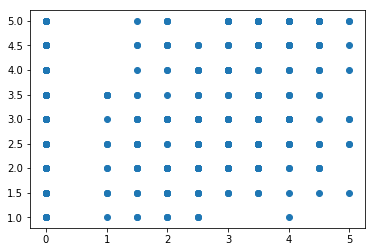

In [102]:
import matplotlib.pyplot
import pylab

x = prelist[0:500]
y = actuallist[0:500]
#print(x)
#print(y)
matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

In [39]:
print  (aspect_ratings)

[array([ 7.9, 10.1,  2.9,  0. ,  3.8,  0. ,  6.3]), array([3.9, 0. , 0. , 0. , 2.7, 0. , 1.9]), array([ 0. , 11.1,  0. ,  0. ,  0. ,  0. ,  0. ]), array([3.3, 4.3, 3.3, 0. , 2.4, 0. , 0. ]), array([0. , 3.9, 0. , 0. , 0. , 0. , 0.9]), array([1.9, 0. , 1.9, 0. , 0. , 0. , 1.9]), array([0. , 3.9, 0. , 0. , 2.1, 0. , 0. ]), array([0. , 0. , 0. , 0. , 0. , 5.8, 0. ]), array([0. , 3.8, 4.6, 0. , 3.5, 0. , 0. ]), array([ 0. ,  2.8,  0. ,  0. ,  0. , -0.5,  2.8]), array([3.6, 0. , 0. , 0. , 0. , 0. , 0. ]), array([4.3, 0. , 0. , 0. , 0. , 0. , 0. ]), array([0., 0., 0., 0., 0., 0., 0.]), array([0. , 0. , 0. , 0. , 0. , 2.3, 0. ]), array([ 0. , -0.1,  0. ,  0. ,  0. ,  0. ,  0. ]), array([0.7, 0. , 0. , 0. , 0. , 0. , 0. ]), array([0. , 1.3, 0. , 0. , 0. , 0. , 0. ]), array([0. , 4.1, 0. , 0. , 0. , 0. , 0. ]), array([0. , 0.4, 0. , 0. , 0. , 0. , 0.4]), array([0. , 1.1, 0. , 0. , 0. , 0. , 0. ]), array([0., 0., 0., 0., 0., 0., 0.]), array([0. , 3.8, 0. , 0. , 0. , 0. , 0. ]), array([0., 0., 0.

# Regression

In [1]:
import nltk, re


In [12]:
a = 'I shot an elephant in my pajamas' 

In [13]:
sentences = nltk.sent_tokenize(a)
sentences = [nltk.word_tokenize(sent) for sent in sentences]
sentences = [nltk.pos_tag(sent) for sent in sentences]

In [14]:
sentences

[[('I', 'PRP'),
  ('shot', 'VBP'),
  ('an', 'DT'),
  ('elephant', 'NN'),
  ('in', 'IN'),
  ('my', 'PRP$'),
  ('pajamas', 'NN')]]

In [ ]:
grammar = """NP: {<JJ><NN>+<VBZ>?<RBR>*<JJ>*}
                 {<NN>+<TO><VB>*}
                 {<RB>+<TO><VB>*}
                 {<VB><IN>?<DT>?<NN>+}
                 {<NNP>+<CC>?}
                 {<DT>?<NN>+<VBZ><RB>*<JJ>+<CC>?<JJ>?<NN>?}
                 {<NNP>+<IN><NNP>+}
                 {}"""

In [30]:
print  (aspect_ratings)

[array([2.1767, 3.0301, 0.173 , 0.    , 0.5106, 0.    , 1.5232]), array([ 0.5511,  0.    ,  0.    ,  0.    ,  0.0772,  0.    , -0.2263]), array([0.    , 3.4429, 0.    , 0.    , 0.    , 0.    , 0.    ]), array([ 0.3134,  0.7153,  0.3134,  0.    , -0.0477,  0.    ,  0.    ]), array([ 0.    ,  0.5563,  0.    ,  0.    ,  0.    ,  0.    , -0.6597]), array([-0.25,  0.  , -0.25,  0.  ,  0.  ,  0.  , -0.25]), array([ 0.    ,  0.5713,  0.    ,  0.    , -0.1779,  0.    ,  0.    ]), array([0.    , 0.    , 0.    , 0.    , 0.    , 1.3277, 0.    ]), array([0.    , 0.5106, 0.8423, 0.    , 0.4019, 0.    , 0.    ]), array([ 0.    ,  0.128 ,  0.    ,  0.    ,  0.    , -1.2114,  0.128 ]), array([0.4404, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]), array([0.7087, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]), array([0., 0., 0., 0., 0., 0., 0.]), array([ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0772,  0.    ]), array([ 0.    , -1.0523,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ]), array([-0.

In [18]:
l1 = ["eat","sleep","repeat"] 
s1 = "geek"
  
# creating enumerate objects 
obj1 = enumerate(l1) 
obj2 = enumerate(s1) 
  
print(list(obj1))
print(list(obj2))

[(0, 'eat'), (1, 'sleep'), (2, 'repeat')]
[(0, 'g'), (1, 'e'), (2, 'e'), (3, 'k')]


In [ ]:
print "Return type:",type(obj1) 
print list(enumerate(l1)) 
  
# changing start index to 2 from 0 
print list(enumerate(s1,2))

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sentences=["decor beauti lobbi furnitur fit time period still comfi","The decor is beautiful, the lobby furniture fits the time period  is still comfy","The rooms in the hotel are really good"]
sid = SIA()
for sentence in sentences:
    ss = sid.polarity_scores(sentence)
    print (ss)

{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.6124}
{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.4927}


In [37]:
sid.polarity_scores("I have never heard of such a thing and would be much less likely to buy this car again, or recommend it to a friend, based on this issue.Originally Reviewed on Jul 24, 2016I am 1000% pleased with the car's performance and reliability, thus far.")

{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.8225}

In [38]:
sid.polarity_scores("I have never heard of such a thing and would be much less likely to buy this car again, or recommend it to a friend, based on this issue.")

{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'compound': 0.6908}

In [39]:
sid.polarity_scores("I am 1000% pleased with the car's performance and reliability, thus far.")

{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.4404}

In [65]:
sid.polarity_scores("Additionally, I would comment that the front seat can be a bit of a challenge to get out of at times, and seems a little cramped at times")
                  

{'neg': 0.0, 'neu': 0.947, 'pos': 0.053, 'compound': 0.0772}

In [50]:
sid.polarity_scores("reliable and safe")

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}